# Escuela de Verano Delphos 2021
Luego de semanas de arduo trabajo, por fin tenemos la lista oficial de asistentes a la Escuela de Verano Delphos 2021. En esta oportunidad, la pandemia obligó a cambiar de metodología y realizar la Escuela de forma remota. Gracias a esto, pudimos expandir la lista de interesados y hoy contamos con **107 inscritos**, cifra totalmente récord y practicamente el doble de la edición pasada. ¿De donde vienen nuestros inscritos? ¿Donde fuimos mas populares? ¿Qué instituciones nos apoyan? Acá intentamos responder todas esas preguntas.

## Instituciones

Los estudiantes de la Escuela vienen de 39 instituciones, concentradas principalmente en Sudamerica, con un par de invitados especiales de Norteamérica y Asia del Sur. Para tener una idea de la cantidad de alumnos por institución, se muestra la siguiente nube de palabras:

In [52]:
import folium
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import requests
import urllib.parse
from wordcloud import WordCloud
from folium.plugins import MarkerCluster

def get_coord(address):
    '''Esta funcion busca las coordenadas de una dirección en openstreetmap.
    Los casos especiales se modificaron para que encontrara la direccion correcta
    '''
    if address=="Universidad Católica del Norte": address+=" Antofagasta"
    if address=="Universidad San Sebastián": address+=" Santiago"
    if address=="Universidad Nacional Andrés Bello": address="Universidad Andrés Bello"
    if address=="Instituto Profesional Inacap": address="Inacap Santiago"
    if address=="Universidad Técnica Federico Santa María": address+=" Santiago"
    if address=="Universidad Adolfo Ibáñez": address+=" Peñalolen"

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

    response = requests.get(url).json()
    return [response[0]["lat"],response[0]["lon"]]

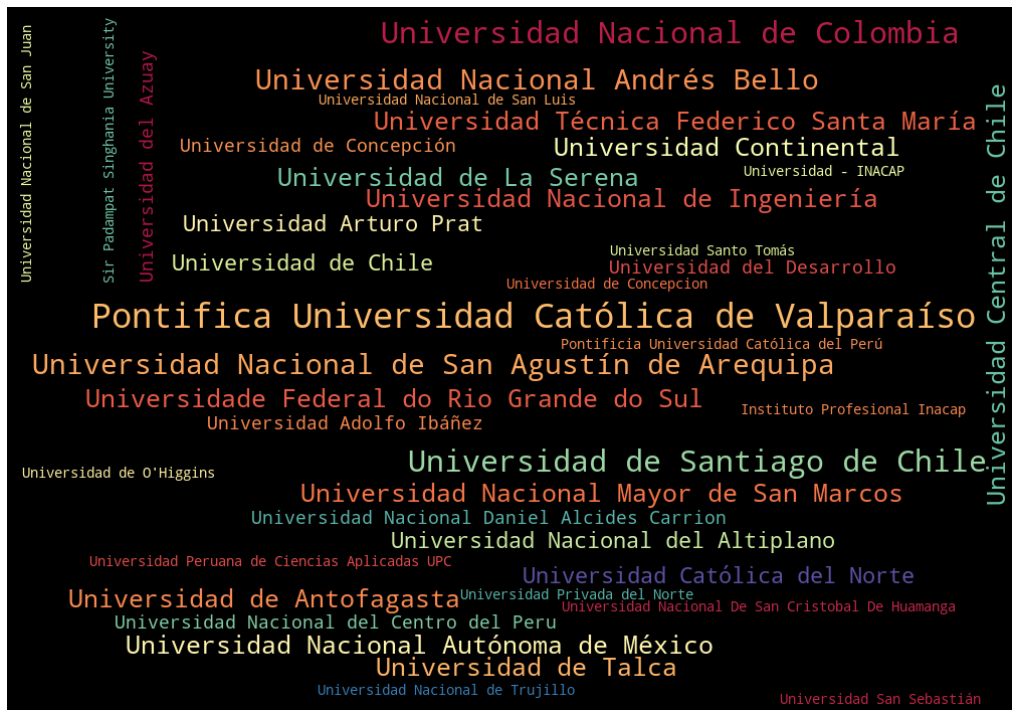

In [41]:
data = pd.read_csv("Raw_data.csv", sep = ";", header=0)

#Filtrado por pago
univ = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].value_counts("Universidad")

#Alumnos Por Universidad
univ = univ.to_frame(name = "Pop")
univ.reset_index(level=0, inplace=True)

## WordCloud Universidades
univ_freq_dict = dict(zip(univ["Universidad"].tolist(), univ["Pop"].tolist()))
wc_univ = WordCloud(width=1000, height=700, background_color = 'black', colormap = 'Spectral').generate_from_frequencies(univ_freq_dict)
plt.figure(figsize=(18, 18))
plt.imshow(wc_univ, interpolation='bilinear')
plt.axis('off')
plt.show()



Entre tanto nombre es fácil perderse. **¿Donde quedan estas Universidades?** El siguiente mapa despliega la locación de cada institución. Ojo con el punto de más a la derecha representando a nuestro estudiante de la **India**!. Al clickear en cada institución, se despliega el nombre y la cantidad de alumnos inscritos.

In [53]:

#Buscar coordenadas de cada Universidad
univ["Loc"] = univ["Universidad"].apply(get_coord)

# Crear mapa en folium
m = folium.Map(
    location = [0, -30],
    zoom_start=2,
    tiles='OpenStreetMap'
)

# Añadir marcadores agrupados
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

# Añadir marcador e informacion de universidad y alumnos
for index,row in univ.iterrows():
    folium.Marker(location=row["Loc"],popup=f"{row['Universidad']}\n Estudiantes: {row['Pop'] }").add_to(marker_cluster)
m